In [1]:
import tensorflow as tf
from data import ClicData
import cv2
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
from net import RecCNN, ComCNN, ImageCodec


Cr = ComCNN()
Cr(tf.zeros([1, 180, 180, 3]))
Cr.load_weights('logs/color/cr/model')

Re = RecCNN()
Re(tf.zeros([1, 180, 180, 3]))
Re.load_weights('logs/color/re/model')

Co = ImageCodec()

In [4]:

ds = ClicData().get_val()
data, = ds.take(1)


compact, ml_sizes = Co.with_sizes( Cr(data) )
ml_images = Re(compact)


jpeg_codec = ImageCodec(quality=95)

jpeg_images, jpeg_sizes = jpeg_codec.with_sizes(data)


print(ml_sizes)
print(jpeg_sizes)

tf.Tensor(
[3631 5097 4895 4355 5053 4609 5417 5866 4631 5711 5173 4355 4638 4991
 3620 3635], shape=(16,), dtype=int16)
tf.Tensor(
[14052 19850 18965 20100 21984 21353 23453 25188 17352 19545 23439 18025
 16615 26281 13261 12765], shape=(16,), dtype=int16)


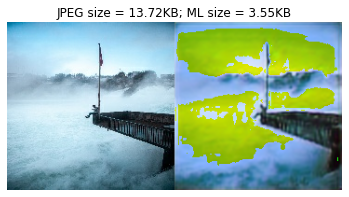

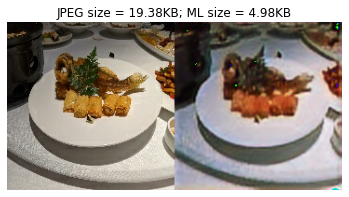

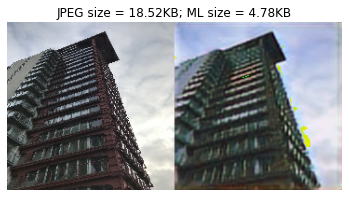

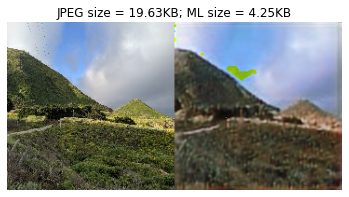

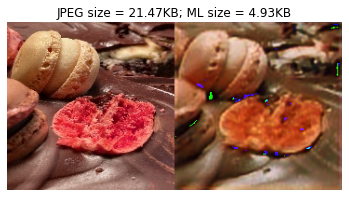

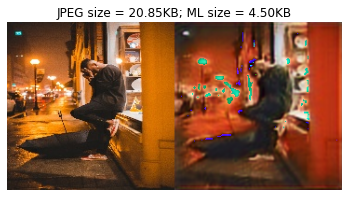

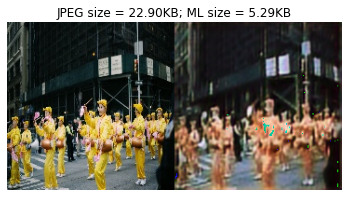

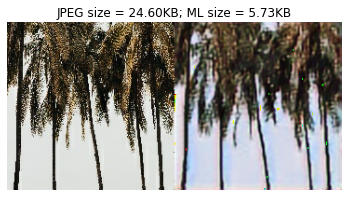

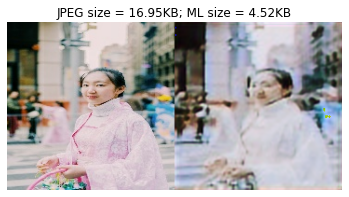

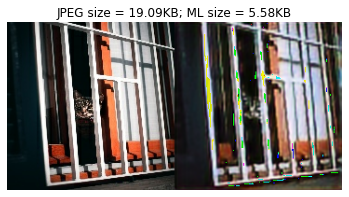

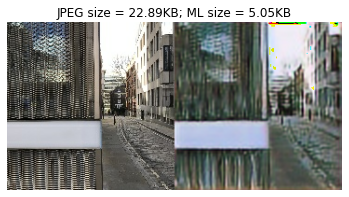

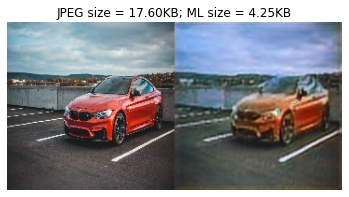

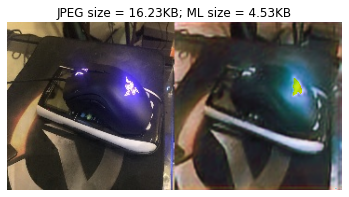

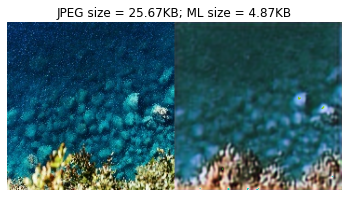

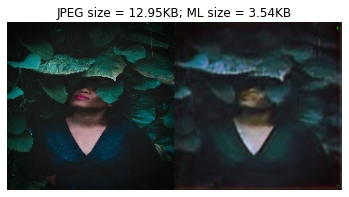

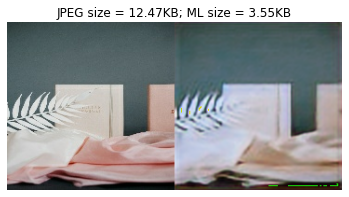

In [23]:
import matplotlib.pyplot as plt

images = tf.concat([jpeg_images, ml_images], axis=2).numpy().astype('uint8')
sizes = tf.stack([jpeg_sizes, ml_sizes], axis=1).numpy()/1024
for i in range(data.shape[0]):
    plt.axis('off')
    j, m = sizes[i]
    plt.title(f'JPEG size = {j:.{2}f}KB; ML size = {m:.{2}f}KB')
    plt.imshow(images[i])
    plt.show()

